In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
from sqlite3 import Error

In [2]:
# reading in data from sql database

In [3]:
def createConnection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

In [4]:
conn = createConnection("../data/newsDatabaseAsyncFinal.db")
articlesData = pd.read_sql_query("SELECT * FROM articles", conn, index_col = "id")
conn.close()

In [5]:
articlesData.head()

,articleUrl,category,publicationTime,articleContent
id,,,,
1,https://www.rmf24.pl/fakty/polska/news-piontko...,kraj,2019-08-26T18:37:00,Szef MEN odniósł się do informacji podanych p...
2,https://www.rmf24.pl/fakty/polska/news-rzeczni...,kraj,2019-08-26T17:47:28,"Jak podkreślił Müller, Janusz Wojciechowski to..."
3,https://www.rmf24.pl/fakty/polska/news-kto-bed...,kraj,2019-08-26T17:20:00,Z nieoficjalnych rozmów reportera RMF FM z prz...
4,https://www.rmf24.pl/fakty/polska/news-mieszka...,kraj,2019-08-26T17:09:20,Powód to groźne dla zdrowia bakterie - enter...
5,https://www.rmf24.pl/fakty/polska/news-ponad-3...,kraj,2019-08-26T17:01:00,"Filip, Tymon, Zosia, Kaja, Malwina i Nela to p..."


In [15]:
articlesData.describe()

,articleUrl,category,publicationTime,articleContent
count,13037,13037,13037,13037
unique,1367,7,12650,12516
top,https://www.rmf24.pl/raporty/raport-greenfesti...,nauka,,
freq,22,2010,47,175


In [16]:
articlesData["articleLength"] = articlesData["articleContent"].apply(lambda x : len(x))

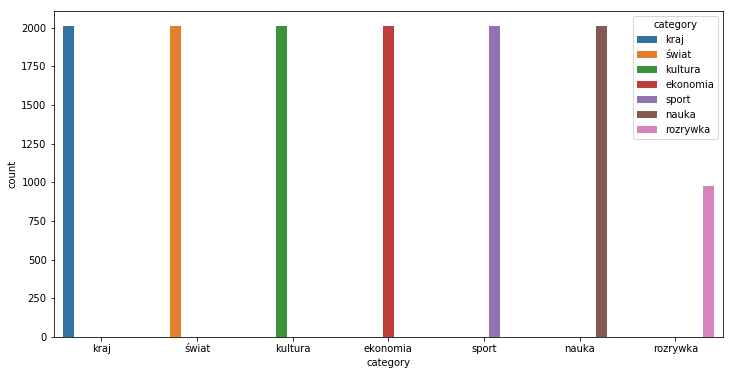

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data = articlesData, x = "category", hue = "category")

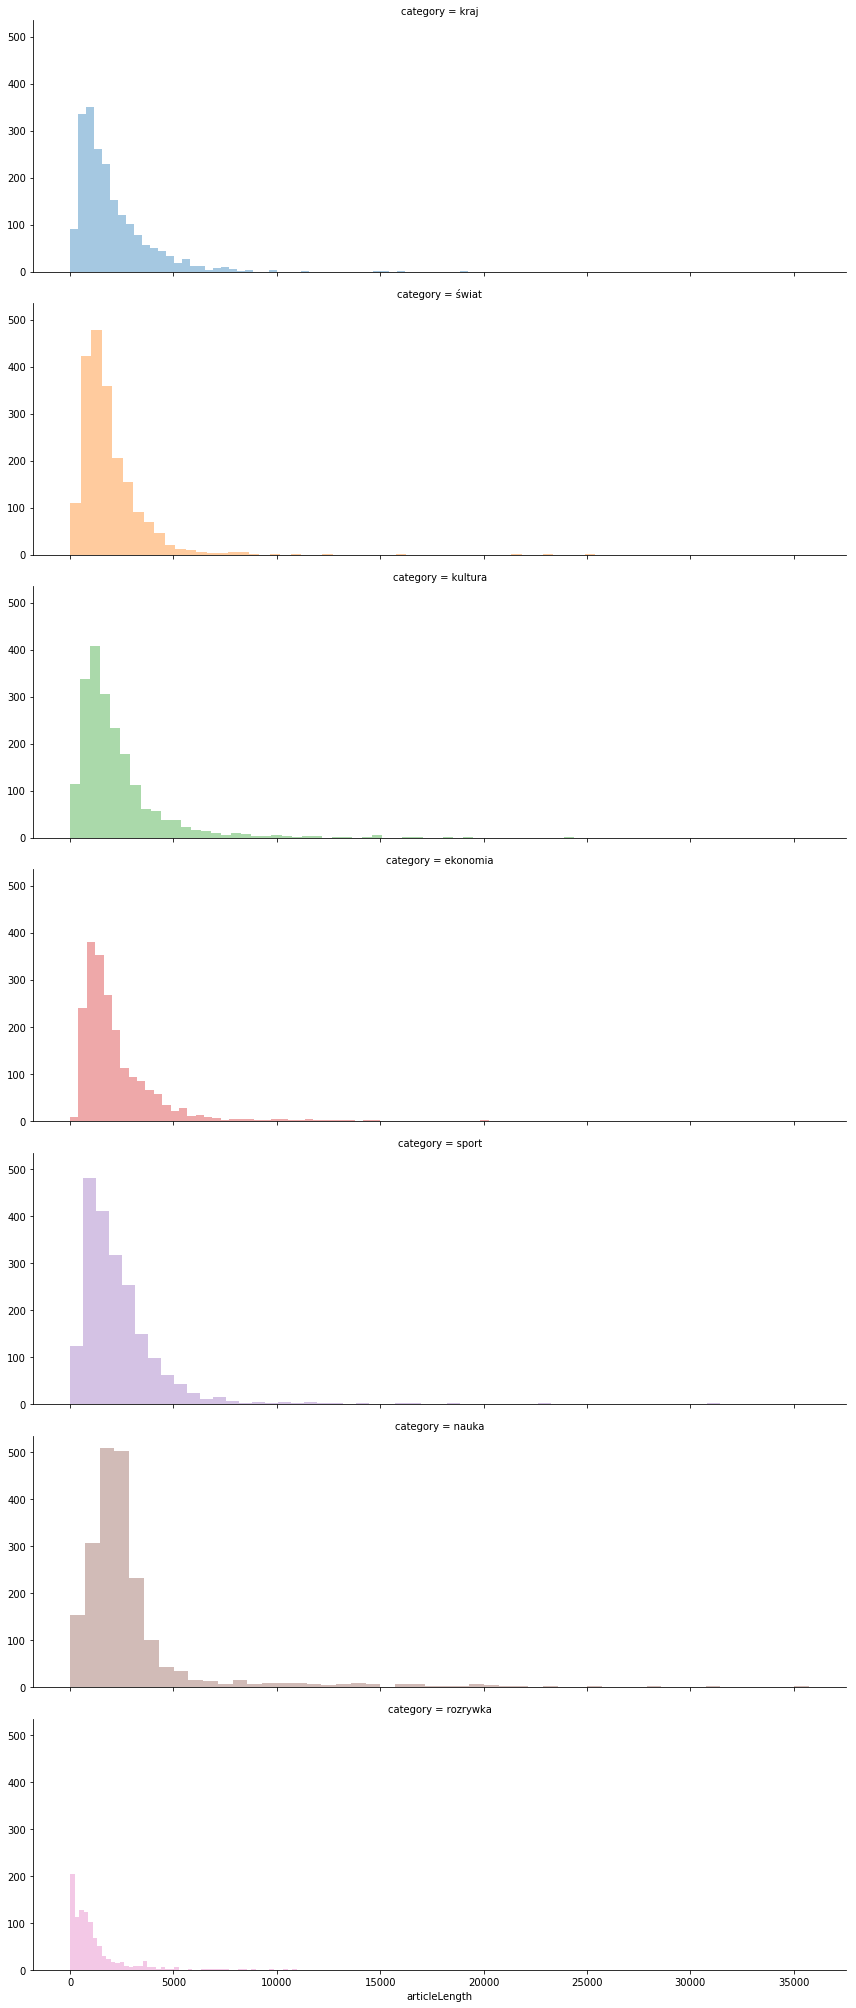

In [30]:
g = sns.FacetGrid(articlesData, row="category", hue="category", height=4, aspect=3)
g = (g.map(sns.distplot, "articleLength", hist=True, kde=False))

In [41]:
print("Articles shorter than 100 chars.: ", len(articlesData[articlesData["articleLength"] < 100]) )
print("Articles longer than 10000 chars.: ", len(articlesData[articlesData["articleLength"] > 10000]) )

Articles shorter than 100 chars.:  293
Articles longer than 10000 chars.:  159


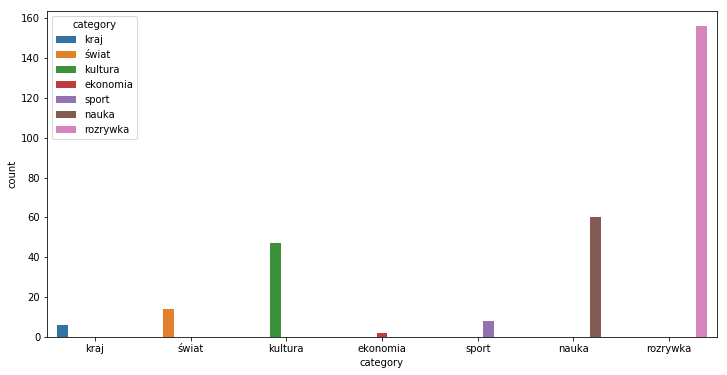

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data = articlesData[articlesData["articleLength"] < 100], x = "category", hue = "category")

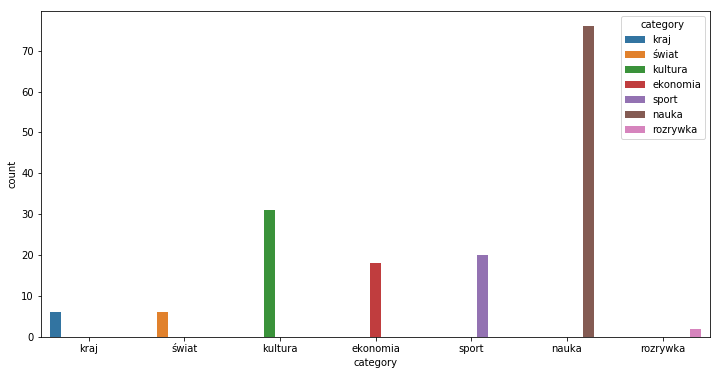

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(data = articlesData[articlesData["articleLength"] > 10000], x = "category", hue = "category")